In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset
import seaborn as sns

# load dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


# clean dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_us = df[df['job_country'] == 'United States'].dropna(subset = ['salary_year_avg'])

In [7]:
job_titles = df_us['job_title_short'].value_counts().index[:6].to_list()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [8]:
df_us_top_six = df_us[df_us['job_title_short'].isin(job_titles)]

In [15]:
sorted_jobs = df_us_top_six.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

(0.0, 600000.0)

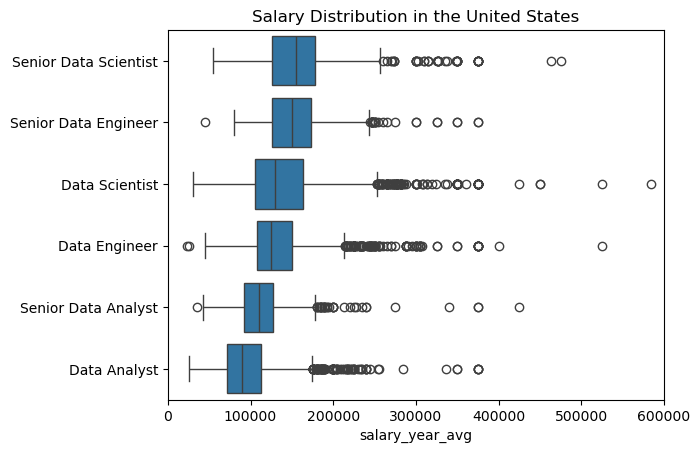

In [17]:
sns.boxplot(data=df_us_top_six, vert=False, x='salary_year_avg', y='job_title_short', order=sorted_jobs)

plt.title('Salary Distribution in the United States')
plt.ylabel('')
plt.xlim(0, 600000)